In [47]:
import numpy as np #importing numpy.
import pandas as pd #importing pandas.
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv("applemobilitytrends.csv") 
# Preview the first 5 lines of the loaded data 
df.head()

,geo_type,region,transportation_type,alternative_name,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,...,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28
0,country/region,Albania,driving,NaN,100.0,95.30,101.43,97.20,103.55,112.67,...,24.55,31.51,33.59,31.69,33.94,30.22,25.22,30.39,37.39,36.69
1,country/region,Albania,walking,NaN,100.0,100.68,98.93,98.46,100.85,100.13,...,27.93,36.72,34.46,35.39,34.80,34.63,29.00,35.22,41.83,37.53
2,country/region,Argentina,driving,NaN,100.0,97.07,102.45,111.21,118.45,124.01,...,14.54,26.67,27.25,27.61,28.73,30.99,25.92,16.57,27.45,27.12
3,country/region,Argentina,walking,NaN,100.0,95.11,101.37,112.67,116.72,114.14,...,10.59,18.44,19.01,18.47,20.39,22.32,23.31,16.36,18.48,17.49
4,country/region,Australia,driving,NaN,100.0,102.98,104.21,108.63,109.08,89.00,...,53.34,56.93,58.06,59.69,62.87,47.84,41.89,55.39,59.09,59.46


In [68]:
# Saudi all
Saudi = df.loc[df['region'] == "Saudi Arabia"]
Saudi.head()

# Saudi Riyadh

Riyadh = df.loc[df['region'] == "Riyadh"]


#US
US = df.loc[df['region'] == "United States"]


# US DC
DC = df.loc[df['region'] == "Washington DC"]
DC.head()

# Germany
Germany = df.loc[df['region'] == "Germany"]
Riyadh.head()


# Germeny

,geo_type,region,transportation_type,alternative_name,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,...,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28
458,city,Riyadh,driving,الرياض,100.0,100.68,98.11,105.73,103.01,92.53,...,36.08,36.18,38.37,38.48,37.21,30.78,32.28,40.42,45.97,47.54
459,city,Riyadh,walking,الرياض,100.0,97.12,99.22,102.83,102.88,98.04,...,49.63,48.13,47.49,49.18,45.66,45.84,43.79,49.13,57.53,55.48


In [69]:
headers = list(df.columns.values)
headers.pop(0)
headers.pop(0)
headers.pop(0)
headers.pop(0)
headers.pop(len(headers)-1)
headers.pop(len(headers)-1)
for x in range(0,56):
    headers.pop(0)
print(headers)

['2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26']


In [110]:
# DC
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import numpy as np

Riyadh.head(1)
drivingdc = list(DC.iloc[0])
drivingdc.pop(0)
drivingdc.pop(0)
drivingdc.pop(0)
drivingdc.pop(0)
drivingdc.pop(len(headers)-1)
drivingdc.pop(len(headers)-1)
for x in range(0,56):
    drivingdc.pop(0)
walkingdc = list(DC.iloc[1])
walkingdc.pop(0)
walkingdc.pop(0)
walkingdc.pop(0)
walkingdc.pop(0)
walkingdc.pop(len(headers)-1)
walkingdc.pop(len(headers)-1)

print(walkingdc)
for x in range(0,56):
    walkingdc.pop(0)
print(len(walkingdc))

[100.0, 100.78, 103.92, 105.02, 112.26, 96.01, 87.76, 92.49, 96.68, 98.26, 104.15, 120.06, 110.16, 82.43, 99.08, 96.65, 96.56, 99.24, 109.25, 104.35, 80.2, 95.86, 97.36, 94.3, 93.88, 104.65, 102.43, 83.16, 92.82, 98.7, 100.22, 104.81, 120.18, 109.07, 94.05, 100.5, 102.04, 101.29, 101.45, 114.7, 113.41, 88.44, 97.66, 102.08, 101.57, 100.94, 119.47, 109.45, 103.07, 104.46, 106.06, 114.65, 113.59, 88.74, 100.27, 95.38, 90.73, 78.45, 76.38, 60.2, 44.48, 47.06, 40.1, 36.31, 33.61, 33.13, 25.68, 21.63, 22.98, 23.47, 21.16, 22.62, 23.22, 19.22, 18.71, 21.24, 18.3, 17.95, 17.87, 18.21, 16.45, 15.54, 18.87, 17.59, 18.79, 16.92, 17.76, 16.99, 14.23, 17.01, 17.37, 17.02, 17.1, 17.14, 16.61, 16.66, 18.2, 17.76, 17.58, 16.13, 17.53, 16.78, 15.9, 18.61, 17.97]
49


C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


banning gatherings
School shutdown
Home lockdown
49
49


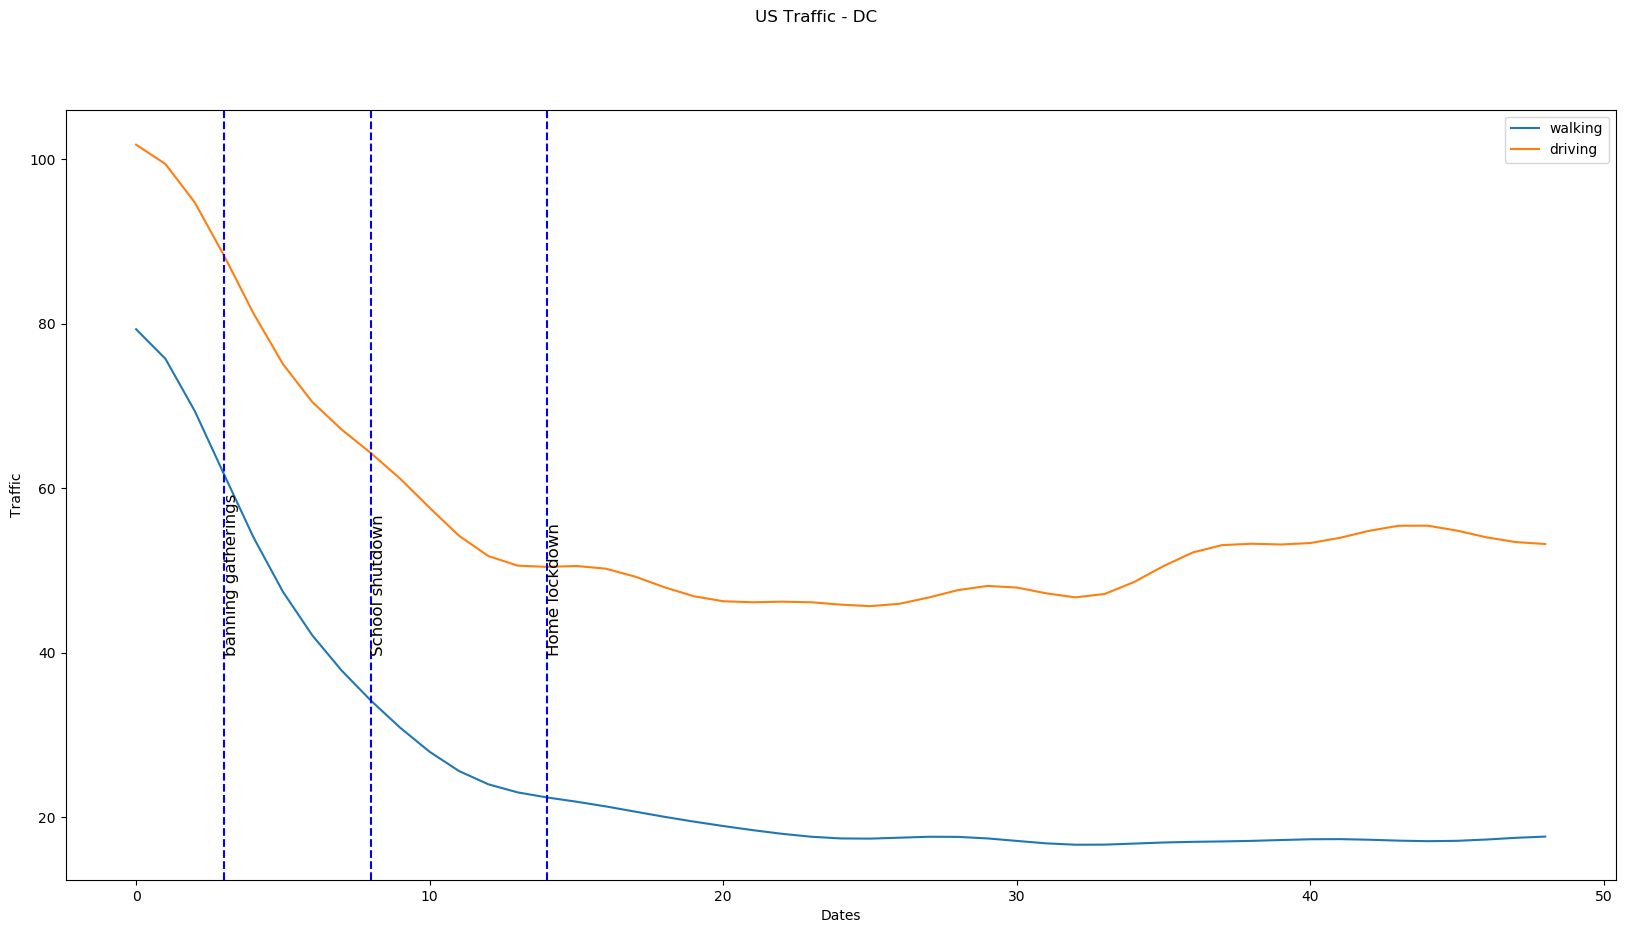

In [137]:
plt.figure(figsize=(20, 10))
# plt.plot(days, walking, label="walking");
# plt.plot(days, driving, label="driving");
ysmoothed = gaussian_filter1d(walkingdc, sigma=2)
plt.plot(days, ysmoothed, label="walking")
ysmoothed2 = gaussian_filter1d(drivingdc, sigma=2)
plt.plot(days, ysmoothed2, label="driving")
plt.suptitle('US Traffic - DC')
plt.xlabel("Dates")
plt.ylabel("Traffic")
# plt.plot(days, walking, label="walking");
# plt.plot(days, driving, label="driving");
# ysmoothed = gaussian_filter1d(np.log10(saudi_cases['Cases']), sigma=2)
# plt.plot(days, ysmoothed, label="Cases")

column_names = ["Cases", "Days", "Dates"]

events = pd.DataFrame(columns = column_names)
events['Cases'] = Cases_df
events['Days'] = Days_df 
events['Dates'] = Date_df 
events['Actions'] = ""
i = 0

for w in range(0,7):
    events.Cases.iloc[w] = 1
    
for w in ActionsDates:
    for x in range(0,len(list(events['Dates']))):
        if(events.Dates.iloc[x] == w):
            events.Actions.iloc[x] = ActionsValues[i]

    print(ActionsValues[i])
    i = i +1
print(len(list(evActions)))


evDays = events['Days']
evActions = events['Actions']
print(len(list(days)))

ActionsDates = ['2020-03-12','2020-03-17','2020-03-23']
ActionsValues = ['banning gatherings','School shutdown','Home lockdown']

ActionsValues1 = []


j=0
for x in evDays:
    if evActions[j] != '':
        plt.axvline(x,color='b',linestyle='dashed')
        plt.text(x,40,evActions[j],rotation=90,fontsize=12)
    j = j + 1
# plt.suptitle('Saudi Arabia Cases')
# plt.xlabel("Dates")
# plt.ylabel("Cases")
plt.legend()
plt.show()

In [70]:
# plot Riyadh
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import numpy as np

Riyadh.head(1)
driving = list(Riyadh.iloc[0])
driving.pop(0)
driving.pop(0)
driving.pop(0)
driving.pop(0)
driving.pop(len(headers)-1)
driving.pop(len(headers)-1)
for x in range(0,56):
    driving.pop(0)
walking = list(Riyadh.iloc[1])
walking.pop(0)
walking.pop(0)
walking.pop(0)
walking.pop(0)
walking.pop(len(headers)-1)
walking.pop(len(headers)-1)

print(walking)
for x in range(0,56):
    walking.pop(0)
print(len(walking))

[100.0, 97.12, 99.22, 102.83, 102.88, 98.04, 91.92, 92.01, 86.07, 87.85, 94.06, 96.99, 83.88, 84.89, 89.63, 91.32, 98.04, 110.5, 112.33, 101.19, 93.74, 95.21, 94.25, 94.38, 112.47, 118.31, 109.27, 97.03, 102.56, 93.15, 104.06, 108.86, 106.85, 97.99, 88.86, 94.34, 87.58, 95.94, 108.63, 107.17, 93.47, 88.54, 86.99, 94.16, 95.53, 125.71, 123.11, 108.58, 99.45, 92.47, 113.11, 119.73, 93.33, 91.14, 96.3, 102.88, 97.26, 102.79, 99.13, 86.3, 76.62, 74.06, 72.97, 68.49, 67.58, 65.71, 57.58, 48.86, 47.17, 46.76, 53.84, 49.36, 48.4, 50.27, 50.46, 55.16, 50.32, 55.75, 53.33, 50.18, 50.87, 51.78, 55.34, 56.3, 65.94, 54.79, 49.95, 49.22, 52.28, 47.76, 44.89, 49.27, 45.57, 43.84, 46.03, 49.63, 48.13, 47.49, 49.18, 45.66, 45.84, 43.79, 49.13, 57.53, 55.48]
49


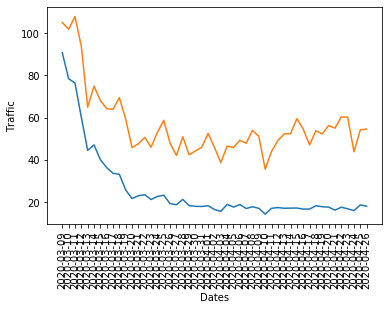

In [111]:




ax = plt.gca()



locator = mdates.DayLocator()
months = mdates.MonthLocator()

plt.plot(headers ,walkingdc, drivingdc)
plt.xlabel("Dates")
plt.ylabel("Traffic")
ax.xaxis.set_minor_locator(locator)
ax.xaxis.set_major_locator(months)
ax.set_xticks(headers)
_=plt.xticks(rotation=90)   
plt.show()
# plot new york

# plot DC

# plot germany

In [57]:
saudi_cases = pd.read_csv("saudi-cases.csv", sep =";") 
saudi_cases = saudi_cases.loc[saudi_cases['Daily / Cumulative'] =="Cumulative"]
saudi_cases = saudi_cases.loc[saudi_cases['City'] =="Riyadh"]
saudi_cases = saudi_cases.loc[saudi_cases['Indicator'] =="Active cases"]
saudi_cases = saudi_cases.sort_values(by=['Date'])
saudi_cases.head(100)


,Daily / Cumulative,Indicator,Date,Event,region,City,Cases
32650,Cumulative,Active cases,2020-03-02,First case of COVID-19,Riyadh,Riyadh,0
26627,Cumulative,Active cases,2020-03-03,NaN,Riyadh,Riyadh,0
15928,Cumulative,Active cases,2020-03-04,Umrah suspension,Riyadh,Riyadh,0
26667,Cumulative,Active cases,2020-03-05,NaN,Riyadh,Riyadh,0
15963,Cumulative,Active cases,2020-03-06,NaN,Riyadh,Riyadh,0
12556,Cumulative,Active cases,2020-03-07,NaN,Riyadh,Riyadh,0
32758,Cumulative,Active cases,2020-03-08,NaN,Riyadh,Riyadh,0
32773,Cumulative,Active cases,2020-03-09,flights suspended to number of countries,Riyadh,Riyadh,1
32797,Cumulative,Active cases,2020-03-10,NaN,Riyadh,Riyadh,1
26790,Cumulative,Active cases,2020-03-11,NaN,Riyadh,Riyadh,1


In [58]:
dates = list(saudi_cases['Date'])

print(len(dates))

56


In [60]:
saudi_cases = saudi_cases.loc[(saudi_cases.Date > '2020-03-08')]

In [74]:
days = []
for w in range(0,len(list(saudi_cases['Date']))):
    days.append(w)

saudi_cases['Days'] = days
i = 0

print(days)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]


In [75]:
print(len(walking))

49


In [124]:
Cases_df = list(saudi_cases['Cases'])
Days_df = list(saudi_cases['Days'])
Date_df = list(saudi_cases['Date'])


column_names = ["Cases", "Days", "Dates"]

ActionsDates = ['2020-03-09','2020-03-16','2020-03-21','2020-03-23','2020-03-26','2020-04-06','2020-04-12']
ActionsValues = ['School suspension','Work suspension/Malls, public places shutdown','public transportion','Curfew 6am-7pm','Riyadh lockdown','24h Curfew','Issuing permissions']

ActionsValues1 = []

column_names = ["Cases", "Days", "Dates"]

events = pd.DataFrame(columns = column_names)
events['Cases'] = Cases_df
events['Days'] = Days_df 
events['Dates'] = Date_df 
events['Actions'] = ""
i = 0

for w in range(0,7):
    events.Cases.iloc[w] = 1
    
for w in ActionsDates:
    for x in range(0,len(list(events['Dates']))):
        if(events.Dates.iloc[x] == w):
            events.Actions.iloc[x] = ActionsValues[i]

    print(ActionsValues[i])
    i = i +1
print(len(list(evActions)))


evDays = events['Days']
evActions = events['Actions']
print(len(list(days)))
#events['Actions'] = ActionsValues1
# Day - Date - Cases

School suspension
Work suspension/Malls, public places shutdown
public transportion
Curfew 6am-7pm
Riyadh lockdown
24h Curfew
Issuing permissions
49
49


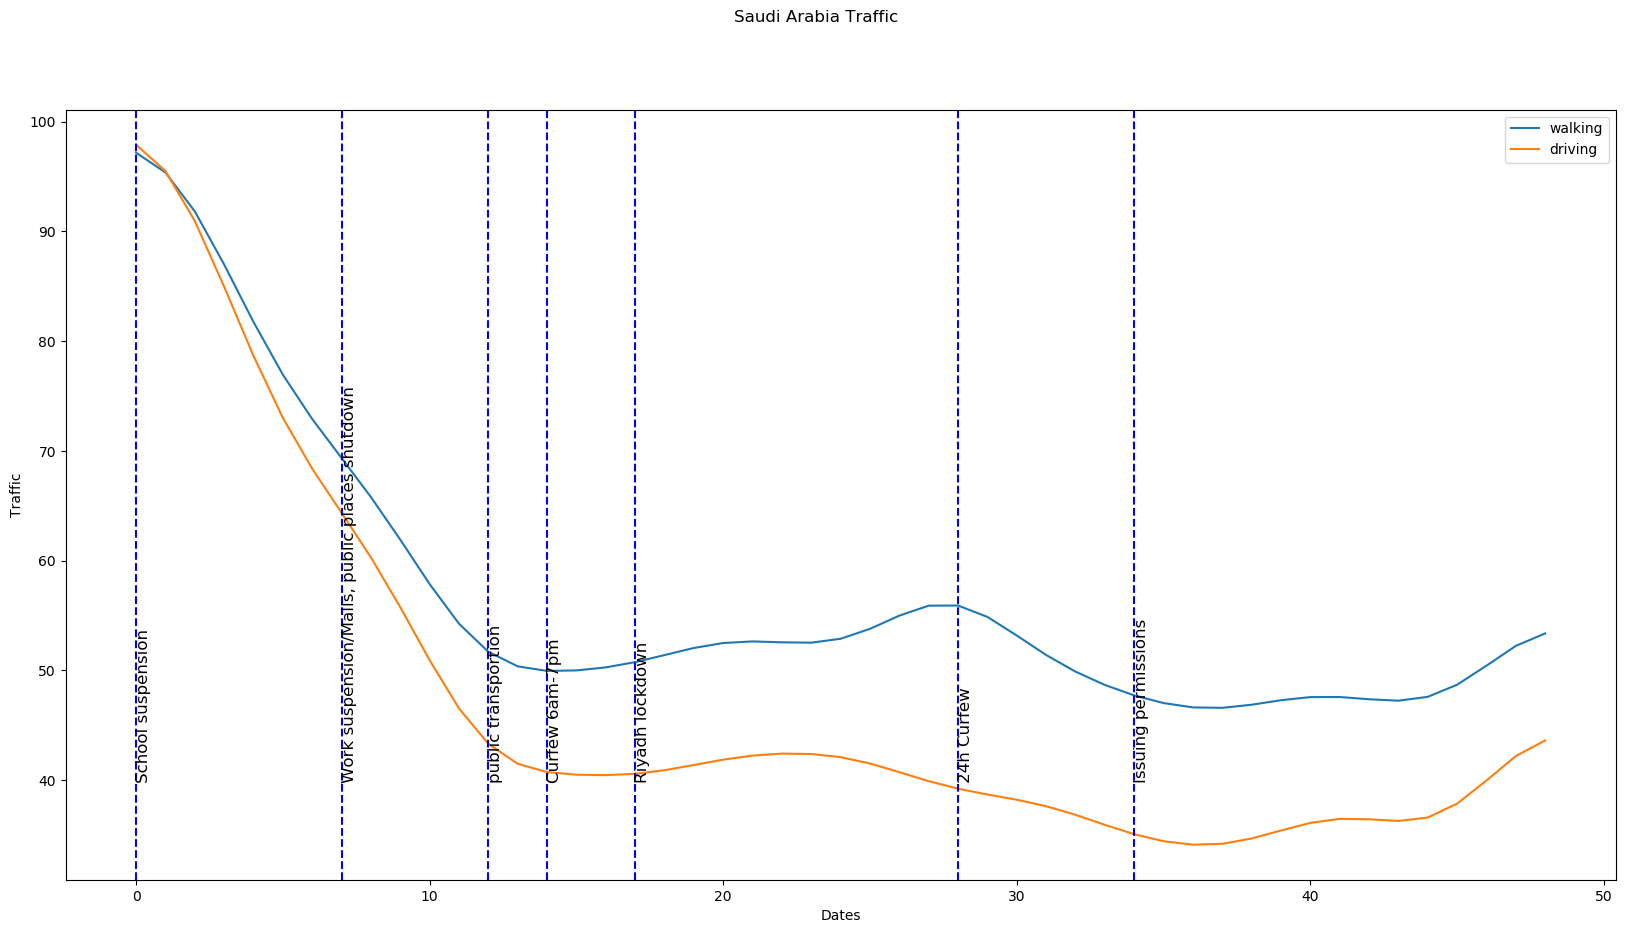

In [133]:
plt.figure(figsize=(20, 10))
# plt.plot(days, walking, label="walking");
# plt.plot(days, driving, label="driving");
ysmoothed = gaussian_filter1d(walking, sigma=2)
plt.plot(days, ysmoothed, label="walking")
ysmoothed2 = gaussian_filter1d(driving, sigma=2)
plt.plot(days, ysmoothed2, label="driving")
plt.suptitle('Saudi Arabia Traffic')
plt.xlabel("Dates")
plt.ylabel("Traffic")
# plt.plot(days, walking, label="walking");
# plt.plot(days, driving, label="driving");
# ysmoothed = gaussian_filter1d(np.log10(saudi_cases['Cases']), sigma=2)
# plt.plot(days, ysmoothed, label="Cases")
j=0
for x in evDays:
    if evActions[j] != '':
        plt.axvline(x,color='b',linestyle='dashed')
        plt.text(x,40,evActions[j],rotation=90,fontsize=12)
    j = j + 1
# plt.suptitle('Saudi Arabia Cases')
# plt.xlabel("Dates")
# plt.ylabel("Cases")
plt.legend()
plt.show()



In [80]:
Cases_df = list(saudi_cases['Cases'])
Days_df = list(saudi_cases['Days'])
Date_df = list(saudi_cases['Date'])


column_names = ["Cases", "Days", "Dates"]

ActionsDates = ['2020-03-09','2020-03-15','2020-03-16','2020-03-21','2020-03-23','2020-03-26','2020-04-06','2020-04-12']
ActionsValues = ['flights suspended/School suspension','International flights suspension','Work suspension/Malls, public places shutdown','Domestic flights suspension/public transportion','Curfew 6am-7pm','Riyadh lockdown','24h Curfew','Issuing permissions']

ActionsValues1 = []


events = pd.DataFrame(columns = column_names)
events['Cases'] = Cases_df
events['Days'] = Days_df 
events['Dates'] = Date_df 
events['Actions'] = ""
i = 0

for w in range(0,7):
    events.Cases.iloc[w] = 1
    
for w in ActionsDates:
    for x in range(0,len(list(events['Dates']))):
        if(events.Dates.iloc[x] == w):
            events.Actions.iloc[x] = ActionsValues[i]

    print(ActionsValues[i])
    i = i +1
print(len(list(ActionsValues1)))
events.head(48)

evDays = events['Days']
evActions = events['Actions']
events.head(48)
#events['Actions'] = ActionsValues1
# Day - Date - Cases

flights suspended/School suspension
International flights suspension
Work suspension/Malls, public places shutdown
Domestic flights suspension/public transportion
Curfew 6am-7pm
Riyadh lockdown
24h Curfew
Issuing permissions
0


C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Cases,Days,Dates,Actions
0,1,0,2020-03-09,flights suspended/School suspension
1,1,1,2020-03-10,
2,1,2,2020-03-11,
3,1,3,2020-03-12,
4,1,4,2020-03-13,
5,1,5,2020-03-14,
6,1,6,2020-03-15,International flights suspension
7,22,7,2020-03-16,"Work suspension/Malls, public places shutdown"
8,41,8,2020-03-17,
9,60,9,2020-03-18,


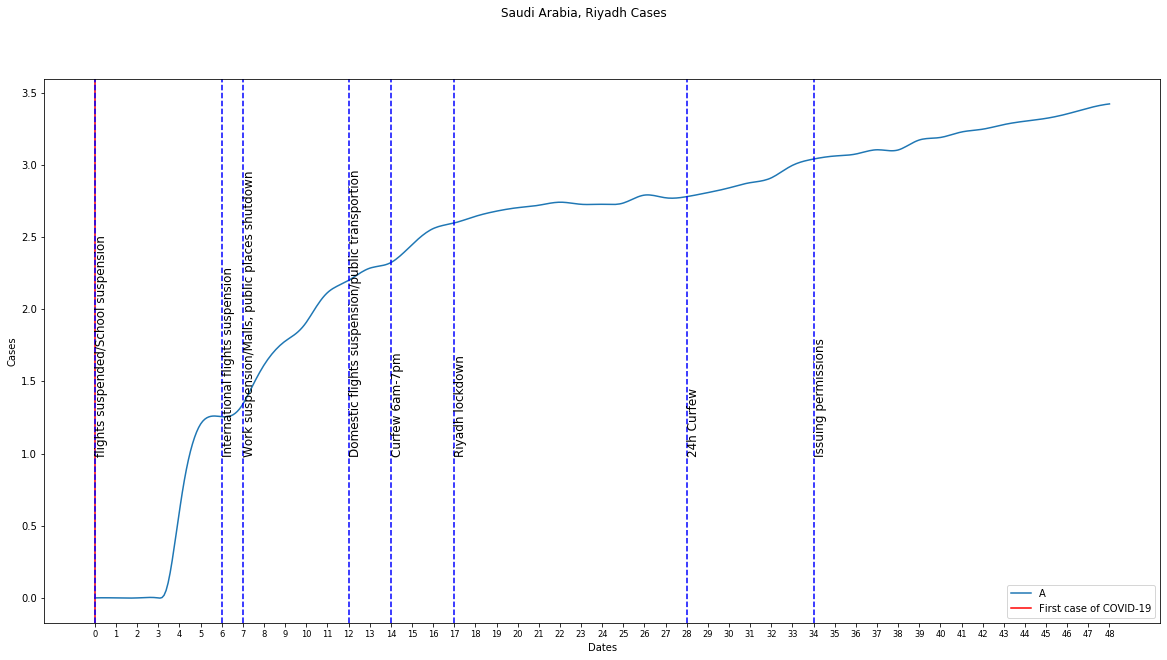

In [82]:
from scipy.interpolate import splrep, splev

plt.figure(figsize=(20, 10))

x =  np.linspace(0, 48, num=49)
A_tck = splrep(x, list(saudi_cases['Cases']))
dates = days
x_new = np.linspace(x.min(), x.max(), 500)
A_new = splev(x_new, A_tck)
plt.plot(x_new, np.log10(A_new), label='A')
plt.xticks(x, dates, size='small')
plt.suptitle('Saudi Arabia, Riyadh Cases')
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.axvline('0',color='r',label="First case of COVID-19")
j = 0
for x in evDays:
    if evActions[j] != '':
        plt.axvline(x,color='b',linestyle='dashed')
        plt.text(x,1,evActions[j],rotation=90,fontsize=12)
    j = j + 1

#         plt.axvline(x,color='b',label="Action",linestyle='dashed')
#         plt.text(w,99,evActions[j],rotation=90,fontsize=12)
plt.legend()
plt.show()

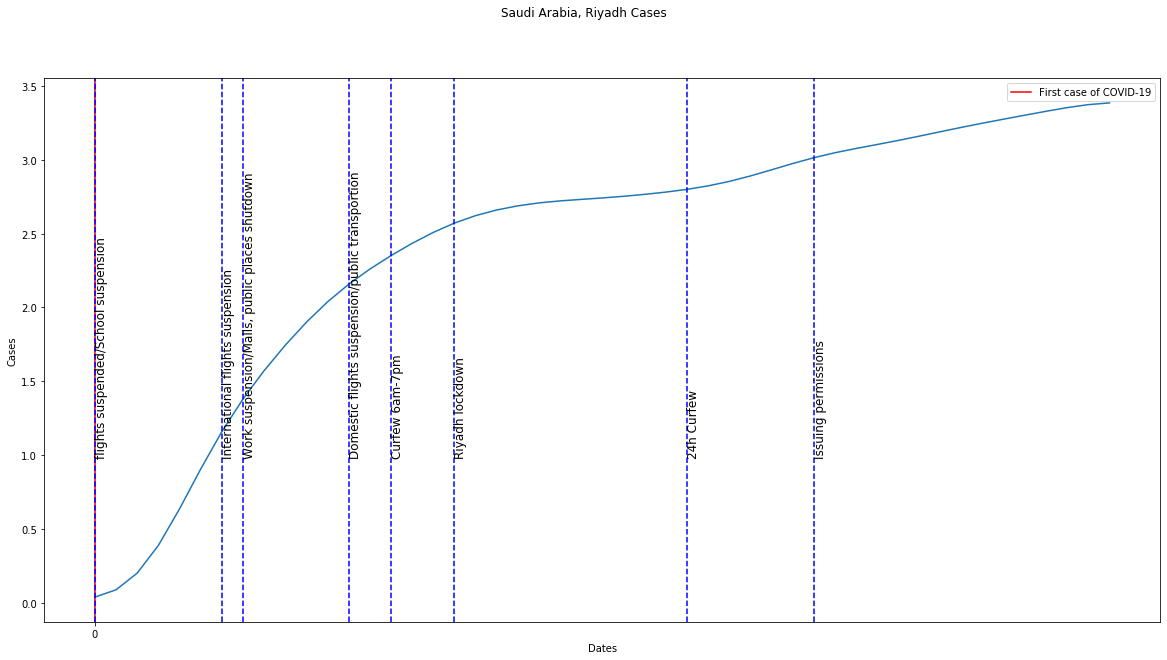

In [83]:
from scipy.interpolate import splrep, splev
from scipy.ndimage.filters import gaussian_filter1d



plt.figure(figsize=(20, 10))

# x =  np.linspace(0, 48, num=49)
# A_tck = splrep(x,  np.log10(list(saudi_cases['Cases'])))
# dates = days_list
# x_new = np.linspace(x.min(), x.max(), 300)
# A_new = splev(x_new, A_tck)
# plt.plot(x_new, A_new, label='A')
ysmoothed = gaussian_filter1d(np.log10(list(saudi_cases['Cases'])), sigma=2)
plt.plot(days, ysmoothed)
# plt.xticks(x, dates, size='small')
plt.suptitle('Saudi Arabia, Riyadh Cases')
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.axvline('0',color='r',label="First case of COVID-19")
j = 0
for x in evDays:
    if evActions[j] != '':
        plt.axvline(x,color='b',linestyle='dashed')
        plt.text(x,1,evActions[j],rotation=90,fontsize=12)
    j = j + 1

#         plt.axvline(x,color='b',label="Action",linestyle='dashed')
#         plt.text(w,99,evActions[j],rotation=90,fontsize=12)
plt.legend()
plt.show()

In [ ]:
# compare 
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-03-2020.csv')
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/05-03-2020.csv')

In [ ]:
cols = confirmed_df.keys()
# https://www.kaggle.com/therealcyberlord/coronavirus-covid-19-visualization-prediction

In [ ]:
# tried comp



#Daily cases



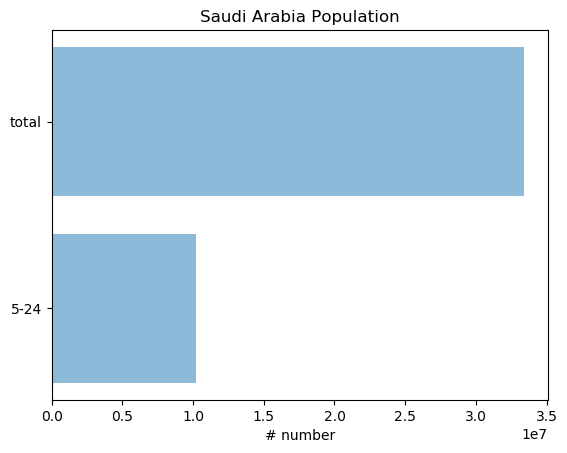

[2788931, 2788931, 2536312, 2312755, 2576498, 33413660]


In [131]:
# populition & age group
ages = []
agesf =  []
totalschool = 0
saudi_pop = pd.read_csv("populationage.csv", sep =";") 
saudi_pop = saudi_pop.loc[saudi_pop['Year'] == 2018]
saudi_pop = saudi_pop.sort_values(by=['Age Groups'])
saudi_pop1 = saudi_pop


saudi_age = saudi_pop.loc[saudi_pop['Age Groups'] == "0 - 4"]
saudi_age = saudi_age.groupby(saudi_pop['Age Groups']).sum()
ages.append(list(saudi_age["Population"]))
agesf.append(ages[0][0])

saudi_age = saudi_pop.loc[saudi_pop['Age Groups'] == "5 - 9"]
saudi_age = saudi_age.groupby(saudi_pop['Age Groups']).sum()
ages.append(list(saudi_age["Population"]))
agesf.append(ages[0][0])
totalschool = ages[0][0] + totalschool


saudi_age = saudi_pop.loc[saudi_pop['Age Groups'] == "10 - 14"]
saudi_age = saudi_age.groupby(saudi_pop['Age Groups']).sum()
ages = []
ages.append(list(saudi_age["Population"]))
agesf.append(ages[0][0])
totalschool = ages[0][0] + totalschool

saudi_age = saudi_pop.loc[saudi_pop['Age Groups'] == "15 - 19"]
saudi_age = saudi_age.groupby(saudi_pop['Age Groups']).sum()
ages = []
ages.append(list(saudi_age["Population"]))
agesf.append(ages[0][0])
totalschool = ages[0][0] + totalschool

saudi_age = saudi_pop.loc[saudi_pop['Age Groups'] == "20 - 24"]
saudi_age = saudi_age.groupby(saudi_pop['Age Groups']).sum()
ages = []
ages.append(list(saudi_age["Population"]))
agesf.append(ages[0][0])
totalschool = ages[0][0] + totalschool

saudi_age = saudi_pop.groupby(saudi_pop['Age Groups']).sum()
saudi_age = saudi_age.groupby(saudi_age['Year']).sum()
ages = []
ages.append(list(saudi_age["Population"]))
agesf.append(ages[0][0])

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('5-24', 'total')
y_pos = np.arange(len(objects))
performance = [totalschool,agesf[5]]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('# number')
plt.title('Saudi Arabia Population')

plt.show()


print(agesf)
#store age group 10 - 14,15-19,20-24
# saudi_pop.head(50)

In [ ]:
# testing dataset

# Saudi Cases map

# Saudi traffic

# Health ads





In [ ]:


# poverty
